In [1]:
# Standard modules
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

# Other modules
import sys
import time

# Import suftware
sys.path.append('../')
import suftware as ft

In [2]:
ft.example_data_1d__datasets

['population',
 'new_hiv_infections',
 'attended_births',
 'hepatitis_b_vaccination',
 'road_traffic_mortality',
 'healthy_life_expectancy',
 'tb_incidence',
 'family_planning_needs_met',
 'malaria',
 'old_faithful_eruption_times',
 'buffalo_snowfall',
 'suicide_mortality',
 'alcohol_consumption',
 'adolescent_birth_rate',
 'maternal_mortaility',
 'treatment_length',
 'neonatal_mortality',
 'under_five_mortatility',
 'life_expectancy_female',
 'old_faithful_waiting_times',
 'life_expectancy_male',
 'life_expectancy_all']

Deft1D computation took 0.379961 sec
Deft1D computation took 0.270525 sec
Deft1D computation took 0.300202 sec
Deft1D computation took 0.143910 sec
Deft1D computation took 0.217964 sec
Deft1D computation took 0.231769 sec
Deft1D computation took 0.238054 sec
Deft1D computation took 0.220526 sec
Deft1D computation took 0.239704 sec
Deft1D computation took 0.199510 sec
Deft1D computation took 0.206137 sec
Deft1D computation took 0.199230 sec
Deft1D computation took 0.229932 sec
Deft1D computation took 0.167765 sec
Deft1D computation took 0.252831 sec
Deft1D computation took 0.195854 sec
Deft1D computation took 0.205278 sec
Deft1D computation took 0.228844 sec
Deft1D computation took 0.241341 sec
Deft1D computation took 0.189875 sec
Deft1D computation took 0.239624 sec
Deft1D computation took 0.242621 sec


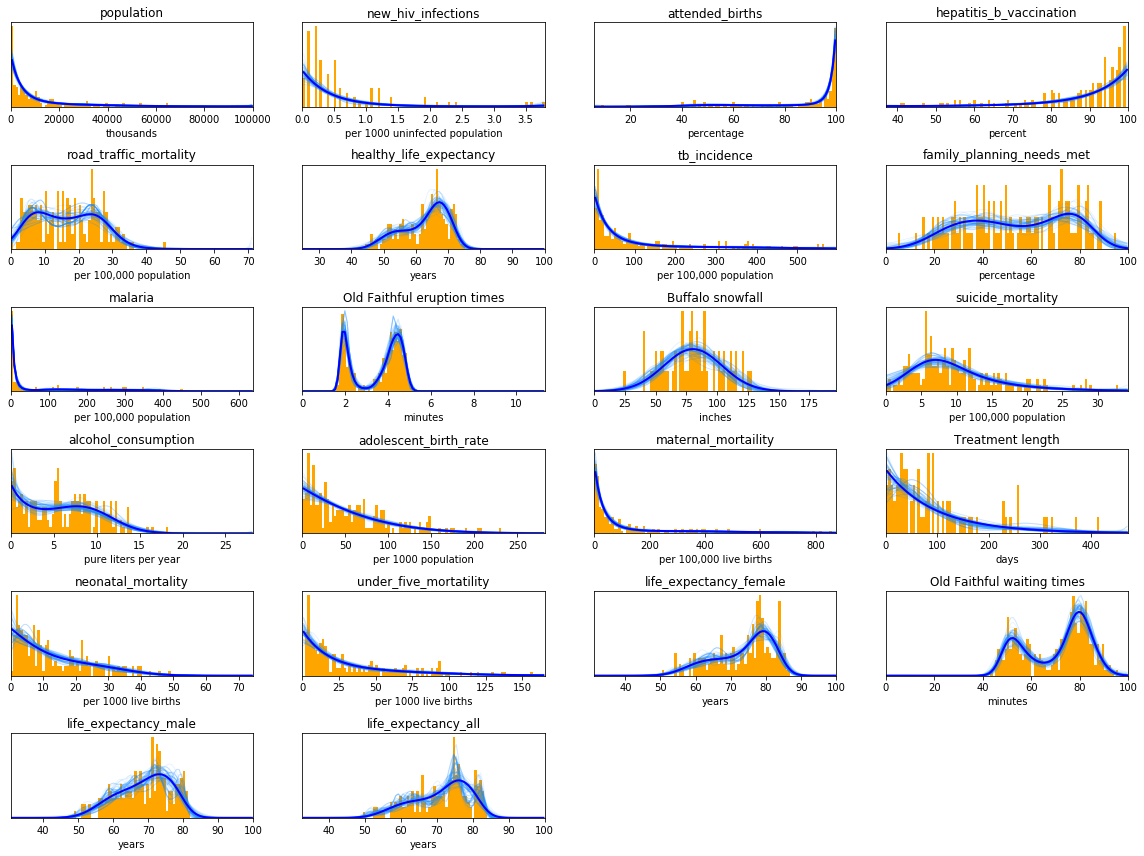

In [3]:
# Simulate data
#data = ft.simulate_data_1d(distribution_type='gaussian', N=10000)

num_rows = 6
num_cols = 4
v_in_per = 2
h_in_per = 4
fig, axs = plt.subplots(num_rows, num_cols,figsize=[h_in_per*num_cols, v_in_per*num_rows])
axs = axs.ravel()

# Default each axis to off
for ax in axs:
    ax.axis('off')

# Plot each dataset
for n, dataset in enumerate(ft.example_data_1d__datasets):

    # Use example data
    data, details = ft.example_data_1d(dataset, return_details=True)
    #bbox = details['bbox']
    #print(details)

    # Perform density estimation
    start = time.time()
    Q = ft.Deft1D(data)
    print('Deft1D computation took %f sec'%(time.time()-start))

    ax = axs[n]
    ax.axis('on')
    
    # Plot histogram
    ax.bar(Q.grid, Q.histogram, width=Q.grid_spacing, color='orange')

    # Plot Q_samples
    if Q.num_posterior_samples > 0:
        ax.plot(Q.grid, Q.sample_values, color='dodgerblue', linewidth=1, alpha = .1)

    # Plot Q_star
    ax.plot(Q.grid, Q.evaluate(Q.grid), color='b', linewidth=2)

    # Style plot
    ax.set_xlim(Q.bounding_box)
    ax.set_title(details['description'])
    ax.set_xlabel(details['units'])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()
fig.savefig('example_data.pdf')

In [4]:
ax.boxplot

<bound method Axes.boxplot of <matplotlib.axes._subplots.AxesSubplot object at 0x10f84ea90>>